# Pyber Ride Sharing Data

## Analysis

-  Observed Trend 1 : Urban market has the highest fare share of approximately 63%

-  Observed Trend 2 : Urban market has the highest ride share of approximately 68.4%

-  Observed Trend 3 : Urban market has the highest driver share of approximately 77.8%

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cityData = pd.read_csv('raw_data/city_data.csv')
rideData = pd.read_csv('raw_data/ride_data.csv')
typColor = {'Urban':'lightcoral','Suburban':'lightskyblue','Rural':'gold'}
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)

### Bubble Plot of Ride Sharing Data

In [2]:
df_cityDataFinal = pd.DataFrame({'AverageFare': rideData.groupby('city').fare.mean(),
                   'NoOfRides': rideData.groupby('city').ride_id.nunique(),
                   'DriverCount': cityData.groupby('city').driver_count.sum(),
                    'type': cityData.groupby('city').type.apply(lambda x : ''.join(x.unique()))})
df_cityDataFinal['TotalFare'] = df_cityDataFinal['AverageFare'] * df_cityDataFinal['NoOfRides']

In [3]:
df_cityDataFinal.head()

,AverageFare,DriverCount,NoOfRides,type,TotalFare
city,,,,,
Alvarezhaven,23.928710,21,31,Urban,741.79
Alyssaberg,20.609615,67,26,Urban,535.85
Anitamouth,37.315556,16,9,Suburban,335.84
Antoniomouth,23.625000,21,22,Urban,519.75
Aprilchester,21.981579,49,19,Urban,417.65


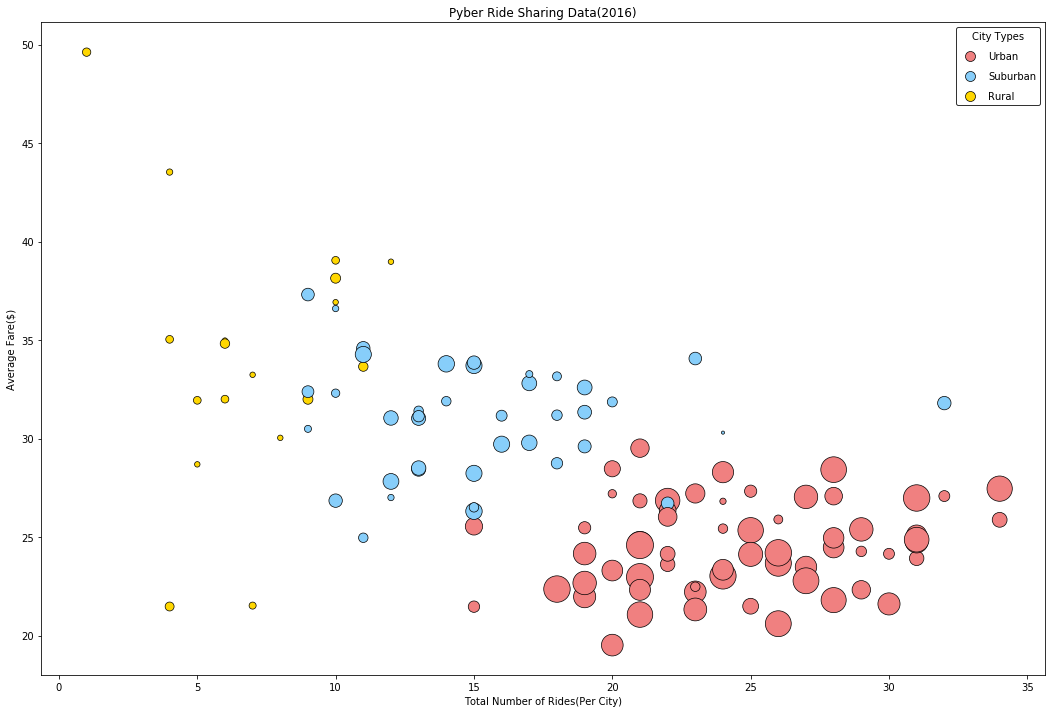

In [4]:
plt.figure(figsize=(18,12))
patches11 = [ plt.plot([],[], marker="o", ms=10, ls="", mec="black", mew=0.7, color=list(typColor.values())[i]) [0]  for i in range(len(typColor))]
plt.scatter(x=df_cityDataFinal['NoOfRides'], y=df_cityDataFinal['AverageFare'], s=(df_cityDataFinal['DriverCount']*10), c=df_cityDataFinal['type'].apply(lambda x: typColor[x]), edgecolor="k", linewidth=0.7)
plt.legend(patches11,typColor.keys(),loc="best", frameon=True, edgecolor='black', labelspacing=1, title="City Types")
plt.gca().set(xlabel='Total Number of Rides(Per City)', ylabel='Average Fare($)', title='Pyber Ride Sharing Data(2016)')
plt.show()

### Total Fares By City Type

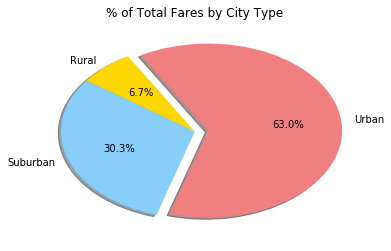

In [5]:
sFare = df_cityDataFinal.groupby('type').TotalFare.sum()
fbct_df = pd.DataFrame(sFare)
plt.pie(fbct_df['TotalFare'], explode=explode, labels=fbct_df.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Fares by City Type")
plt.show()

### Total Rides By City Type

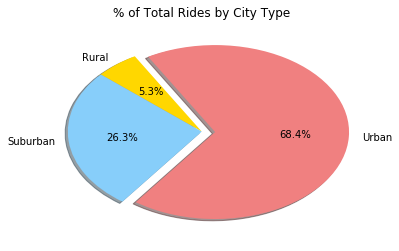

In [6]:
sRide = df_cityDataFinal.groupby('type').NoOfRides.sum()
rbct = pd.DataFrame(sRide)
plt.pie(rbct['NoOfRides'], explode=explode, labels=rbct.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Rides by City Type")
plt.show()

### Total Drivers By City Type

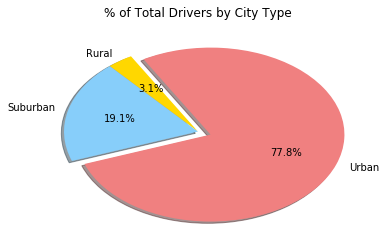

In [7]:
sDrivers = df_cityDataFinal.groupby('type').DriverCount.sum()
dbct = pd.DataFrame(sDrivers)
plt.pie(dbct['DriverCount'], explode=explode, labels=dbct.index, colors=colors, autopct="%1.1f%%", shadow=True, startangle=120)
plt.title("% of Total Drivers by City Type")
plt.show()